In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc
import cmath

In [5]:
def matrix(n,diag,upper,lower):
  k=len(diag)
  dia=[]
  for i in range(n):
    for j in range(k):
      dia.append(diag[j])

  #UPPER
  up=[]
  for i in range(n):
    for j in range(k):
      up.append(upper[j])

  up=up[:-1]
  A=np.diag(dia)


  for i in range(int(n*k)-1):
    A[i][i+1]=up[i]
    A[i+1][i]=up[i]

  #N=int(n*k)
  #A[0][0]=A[0][0]+pert[0]
  #A[N-1][N-1]=A[N-1][N-1]+pert[1]

  return(A)

In [6]:
def matrix_fixed_bc(n,diag,upper,lower,pert):
  k=len(diag)
  dia=[]
  for i in range(n):
    for j in range(k):
      dia.append(diag[j])

  #UPPER
  up=[]
  for i in range(n):
    for j in range(k):
      up.append(upper[j])

  up=up[:-1]
  A=np.diag(dia)


  for i in range(int(n*k)-1):
    A[i][i+1]=up[i]
    A[i+1][i]=up[i]

  N=int(n*k)
  A[0][0]=A[0][0]+pert[0]
  A[N-1][N-1]=A[N-1][N-1]+pert[1]

  return(A)

In [7]:
def pert(n,k):
  u=np.random.rand(int(n*k))#vec[0]#[0.1,0,100]
  for i in range(1,int(n*k)-1):
    u[i]=0
  v=u#[0.1,0,100]
  u,v=np.array(u)/(np.linalg.norm(u)),np.array(v)/(np.linalg.norm(v))
  v=v.T

  v=v.reshape(1,int(n*k))
  u=u.reshape(int(n*k),1)

  c=(u @ v)

  return(c,u)

#c=(u @ v.T)

In [8]:
def qgamma(diag_k,u_k,l_k,k):    #to find gamma  and  Qk(z)
  a=diag_k
  p=np.multiply(u_k,l_k)
  Aim11 =1
  Aim12 =0
  Aim13 =0
  Aim14 =1
  for i in range(k):
    Ai1 = [1,a[i]]
    Ai2 = [0,-p[i]]
    Ai3 = [0,1]
    Ai4 =  [0,0]
    P1 = np.convolve(Aim11,Ai1) +np.convolve(Aim12,Ai3)
    P2 = np.convolve(Aim11,Ai2) +np.convolve(Aim12,Ai4)
    P3 = np.convolve(Aim13,Ai1) +np.convolve(Aim14,Ai3)
    P4 = np.convolve(Aim13,Ai2) +np.convolve(Aim14,Ai4)
    Aim11 = P1
    Aim12 = P2
    Aim13 = P3
    Aim14 = P4
    #print(P1,P2,P3,P4)
    
  q=P1+P4  #trace of Uk
  gamma1=-np.prod(p)  #gamma1 is the negative of the determinant of Uk
  P4=np.array(P4)
  return(q,gamma1)

In [9]:
def chebeig(diag_k,u_k,l_k,k,t):      
  n=int(k*t)
  q,g=qgamma(diag_k,u_k,l_k,k)
  #print(diag_k)
  q=np.array(q,dtype="complex")
  #print(q,g)
  tnroots=np.zeros(int(n/k),dtype=complex)
  for l in range(1,int(n/k)+1):
    tnroots[l-1]=1j*2*np.cos(np.pi/((n/k)+1)*(l))
  #print(tnroots)
  zcheb = []  #upto this fine
  c0=q[k]
  for i in range(int(n/k)):
    q[k]=c0+((cmath.sqrt(g))*tnroots[i])
    
    zcheb=np.concatenate((zcheb,-np.roots(q)))  
  #print(g)
  #print(np.shape(zcheb))
  return(zcheb)

In [10]:
def thomas(A,d):    
    m,n=np.shape(A)
    a=np.diag(A,-1)
    b=np.diag(A)
    c=np.diag(A,1)
    
    a=np.array(a,dtype='complex')
    b=np.array(b,dtype='complex')
    c=np.array(c,dtype='complex')
    d=np.array(d,dtype='complex')
    x=np.zeros(m,dtype="complex")
    
    #forward propogation
    for i in range(m-1):
        w=a[i]/b[i]
        b[i+1]=b[i+1]-(w*c[i])
        d[i+1]=d[i+1]-(w*d[i])
        
    #back substitution
    
    x[m-1]=d[m-1]/b[m-1]
    
    for i in range(m-2,-1,-1):
        x[i]=(d[i]-(c[i]*x[i+1]))/b[i]
        
    return(x)

In [11]:
def inv_itr(A,muo):
    e_m=7./3-4./3-1  #machine epsion
    m,n=np.shape(A)
    x=np.ones(m)#np.random.rand(m)
    #print(x)
    B=(A-muo*np.identity(m))
    #check diagonal elements of B are zero or not.If it is zero, add some perturbation.
    
    for i in range(m):
        if(B[i][i]==0):
            B[i][i]=B[i][i]

    for  i in range(10):
        v=thomas(B,x)
        if((np.linalg.norm(v))==0):
            v=np.array(v)#/(np.linalg.norm(v))  #x is the eigen vector.
        else:
            v=np.array(v)/(np.linalg.norm(v))
            
    muo=np.transpose(v)@A@v   #muo is the eigen value
    return(muo,v)  

In [ ]:
a=[1,2,3,4]
b=[0,1,5,8]

In [ ]:
#find closest number for each element in a
cl_no=[]
for i in range(4):
  d=100
  for j in range(4):
    if(abs(a[i]-b[j])<d):

      d=abs(a[i]-b[j])
      J=j

  cl_no.append(b[J])

In [ ]:
cl_no

[1, 1, 1, 5]

In [ ]:
val_cheb

array([0.18119411-0.j, 0.24981217-0.j, 0.90499857-0.j, 0.97361664-0.j])

In [ ]:
val_built

array([0.22089243, 0.93208972, 5.71453715, 8.44210219])

In [ ]:
def replace(N,D):
  ind=[]
  for i in range(N):
    I,J=np.where(D == min(D[:,i]))

    I=I[0]

    J=J[0]

  #if(min(D[:,J])!=min(D[I])):
  #if(len(ind)<(N-2)):
    ind.append(I)

  ind.sort()
  ind=list(set(ind))

  ind=np.array(ind)

  a=[]
  for i in range(N):
    k=0
    for j in range(len(ind)):
      if(ind[j]!=i):
        k=k+1

    if(k>(N-3)):  
      a.append(i)

  return(ind,a)

In [12]:
def qgamma_n(diag_k,u_k,l_k,k):    #to find gamma  and  Qk(z)
  a=diag_k
  p=np.multiply(u_k,l_k)
  Aim11 =1
  Aim12 =0
  Aim13 =0
  Aim14 =1
  for i in range(k):
    Ai1 = [1,a[i]]
    Ai2 = [0,-p[i]]
    Ai3 = [0,1]
    Ai4 =  [0,0]
    P1 = np.convolve(Aim11,Ai1) +np.convolve(Aim12,Ai3)
    P2 = np.convolve(Aim11,Ai2) +np.convolve(Aim12,Ai4)
    P3 = np.convolve(Aim13,Ai1) +np.convolve(Aim14,Ai3)
    P4 = np.convolve(Aim13,Ai2) +np.convolve(Aim14,Ai4)
    Aim11 = P1
    Aim12 = P2
    Aim13 = P3
    Aim14 = P4
    #print(P1,P2,P3,P4)
    
  q=P1+P4  #trace of Uk
  gamma1=-np.prod(p)  #gamma1 is the negative of the determinant of Uk
  P4=np.array(P4)
  return(P1,P2,P3,P4)

In [13]:
def chebeig_n(diag_k,u_k,l_k,k,t):      
  n=int(k*t)
  q,g=qgamma(diag_k,u_k,l_k,k)
  #print(diag_k)
  q=np.array(q,dtype="complex")
  #print(q,g)
  tnroots=np.zeros(int(n/k),dtype=complex)
  for l in range(1,int(n/k)+1):
    tnroots[l-1]=1j*2*np.cos(np.pi/((n/k)+1)*(l))
  #print(tnroots)
  zcheb = []  #upto this fine
  c0=q[k]
  for i in range(int(n/k)):
    q[k]=c0+((cmath.sqrt(g))*tnroots[i])
    
    zcheb=np.concatenate((zcheb,-np.roots(q)))  
  #print(g)
  #print(np.shape(zcheb))
  return(tnroots,zcheb)

##gamma=0

In [ ]:
k=3
diag=[0,0,0]#,30,20,1]#np.random.rand(k)#
upper=[0,0,1]#,6,5,10]#np.random.rand(k) #[5,4,1]#-
lower=[1,1,1]#upper#np.random.rand(k)#upper

upper,lower,diag=np.array(upper),np.array(lower),np.array(diag)
pert=[30,-50]

In [51]:
#builtin unperturbed: N=1
n=1
A=matrix(n,diag,upper,lower)
Q,vec_built=np.linalg.eig(A)

In [52]:
#builtin fixed : n=2
n=2
A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
perturb,vec_built_fixed=np.linalg.eig(A_fixed_bc)

In [53]:
perturb

array([  1.,  -1.,  30.,   0.,   0., -50.])

In [31]:
n=10
perturb=list(perturb)
Q=list(Q)
for i in range(n-2):
  perturb=perturb+Q

perturb.sort()
perturb=np.array(perturb)

A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
built,vec_built_fixed=np.linalg.eig(A_fixed_bc)

built.sort()

In [54]:
perturb=list(perturb)
Q=list(Q)

In [55]:
len(perturb)

6

In [56]:
#Add the graph
Err_built=[]
N=[]
for n in range(3,500,5):
  #s=[]
  s=perturb+Q
  for j in range(n-3):
    s=s+Q
  s.sort()
  s=np.array(s)
  #print("s= ",len(s))
  
  A_fixed_bc=matrix_fixed_bc(n,diag,upper,lower,pert)
  built,vec_built_fixed=np.linalg.eig(A_fixed_bc)
  built.sort()
  #print("built= ",len(built))
  #print("s= ",len(s))

  e_b=sum(abs(built-s))/(n*k)
  Err_built.append(e_b)

  N.append(n)


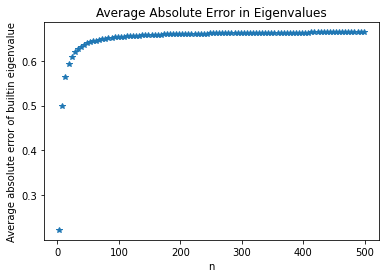

In [57]:
plt.plot(N,Err_built,"*")
plt.title("Average Absolute Error in Eigenvalues")
plt.xlabel("n")
plt.ylabel("Average absolute error of builtin eigenvalue")
plt.savefig("gamma=0:builtin error:d=[0,0,0],u=[0,0,1],l=[1,1,1],pert=[30,-50].png")